<a href="https://colab.research.google.com/github/swarnava-96/Malaria-Detection-using-CNN/blob/main/Malaria_Detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Malaria Detection using CNN**
In this Deep Learning Project, we will predict whether a person is suffering from Malaria or not using CNN.

In [25]:
cd "/content/drive/MyDrive/Malaria"

/content/drive/MyDrive/Malaria


In [26]:
# Lets install tensorflow version 2.5.0
!pip install tensorflow==2.5

In [27]:
# Lets check
import tensorflow
tensorflow.__version__

'2.5.0'

In [28]:
# Importing the necessary libraries

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
# Lets resize all the images

IMAGE_SIZE = [224,224]

train_path = "/content/drive/MyDrive/Malaria/Sample Dataset/Train"
test_path = "/content/drive/MyDrive/Malaria/Sample Dataset/Test"

In [30]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))

In [31]:
# Lets see the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0

In [32]:
# Compiling the model - telling the model what cost and optimization method to use
model.compile(loss = "categorical_crossentropy",
              optimizer = "adam", 
              metrics = ["accuracy"])

In [33]:
# Using the ImageDataGenerator to import the images from the dataset

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [34]:
# Making sure that we provide the same target size as initialized for the image size -- passing the train images to our model

training_set = train_datagen.flow_from_directory("/content/drive/MyDrive/Malaria/Sample Dataset/Train",
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = "categorical")

Found 416 images belonging to 2 classes.


In [35]:
# Passing the test images to our model

test_set = test_datagen.flow_from_directory("/content/drive/MyDrive/Malaria/Sample Dataset/Test",
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = "categorical")

Found 134 images belonging to 2 classes.


In [53]:
# Model Fitting

r = model.fit_generator(training_set, validation_data = test_set, epochs = 100, steps_per_epoch = len(training_set), validation_steps = len(test_set))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
13/13 [==============================] - 23s 2s/step - loss: 0.1426 - accuracy: 0.9495 - val_loss: 0.3954 - val_accuracy: 0.8507
Epoch 2/100
13/13 [==============================] - 22s 2s/step - loss: 0.1203 - accuracy: 0.9591 - val_loss: 0.3085 - val_accuracy: 0.8731
Epoch 3/100
13/13 [==============================] - 22s 2s/step - loss: 0.0696 - accuracy: 0.9856 - val_loss: 0.2288 - val_accuracy: 0.9179
Epoch 4/100
13/13 [==============================] - 22s 2s/step - loss: 0.0272 - accuracy: 0.9952 - val_loss: 0.2277 - val_accuracy: 0.9328
Epoch 5/100
13/13 [==============================] - 22s 2s/step - loss: 0.1013 - accuracy: 0.9688 - val_loss: 0.4791 - val_accuracy: 0.8582
Epoch 6/100
13/13 [==============================] - 22s 2s/step - loss: 0.0679 - accuracy: 0.9856 - val_loss: 0.2832 - val_accuracy: 0.9030
Epoch 7/100
13/13 [==============================] - 22s 2s/step - loss: 0.0373 - accuracy: 0.9880 - val_loss: 0.3580 - val_accuracy: 0.9104
Epoch 8/100
1

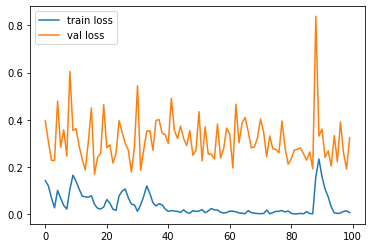

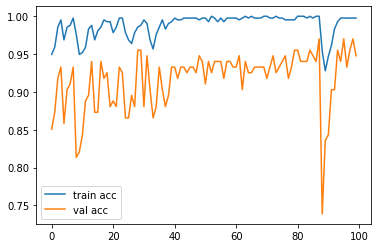

In [54]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()


# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()


In [55]:
# Saving the model to reuse it later

from tensorflow.keras.models import load_model
model.save("model_malaria.h5")

In [56]:
# Prediction and Validation

from tensorflow.keras.models import load_model
from keras_preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
import numpy as np

In [57]:
# Loading the model

model = load_model("model_malaria.h5")

In [58]:
# Lets see how the model predicts on the test dataset

img = image.load_img("/content/drive/MyDrive/Malaria/Sample Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_11.png", target_size = (224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
img_data = preprocess_input(x)
classes = model.predict(img_data)

In [59]:
# Lets see the results

classes

array([[1., 0.]], dtype=float32)

We can see the model correctly predicts that the person is having Malaria.